# Lending Club Case Study
### Introduction
- Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. 
- It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

### Problem Statemnets
The consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


                                                                               
                                                                               
                                                                       Author by:
                                                                               Dr Manjunath M
                                                                               www.linkedin.com/in/dr-manjunath-m 

### 1. Data Sourcing

#### 1.1 Importing Packages python package for analysing the Data Set

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

#### 1. 2 Loading the Loan Dataset and  Data Dictionary which describes the meaning of these variables of Dataset using following code

In [2]:
df = pd.read_csv("loan.csv", index_col=0) # Choosing First column as Index in Loan Data set
df_scheme = pd.read_excel("Data_Dictionary.xlsx", index_col=0) # Choosing First column as Index in Data Dictionary

#### 1. 3Analying the Number of Rows and Columns using shape attribute

In [3]:
df.shape

(39717, 110)

In [4]:
df_scheme.shape

(117, 1)

#### 1. 4 Displaying Maximum number of Rows and column of Data Frame

In [5]:
pd.set_option("display.max.columns", 110)
pd.set_option("display.max.rows",117)

#### 1. 5 Displaying Top Five records of Load Data Set and Data Dictionary DataFrame 

In [6]:
df.head()  

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
df_scheme.head()

,Description
LoanStatNew,
acc_now_delinq,The number of accounts on which the borrower i...
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan...
all_util,Balance to credit limit on all trades
annual_inc,The self-reported annual income provided by th...


#### 1. 6 In order to understand and analyse the loan data set better, read each data Dictionary Description of loan data set column, so we can read full contents without truncating the contents

In [8]:
df_scheme.loc["annual_inc"]["Description"]

'The self-reported annual income provided by the borrower during registration.'

### 2. Data Cleaning
#### 2.1 Analysing missing values, Not a Number (NaN) values in each columns and row 

In [9]:
df.isna()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True
1077430,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True
1077175,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True
1076863,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,Tr

#### 2.2 Analysisng the Columns which are Relavent to the Problem Statement 


In [10]:
df.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=110)

#### 2.3 Analysisng the null values in each column of loan Data Set

In [11]:
df.isnull().sum()

member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0
delinq_2yrs                           0


#### 2.4 Identifying the Missing and Null Values in Loan Data Set

In [12]:
df.dropna(axis="index", how="all")

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### 2.5 Droping all  row which contains only nan value in entire rows of Loan Data Set

In [13]:
df.dropna(axis="index", how="all", inplace=True)

#### 2.6 Analyse the numbers of rows droped using the shape attribute

In [14]:
df.shape

(39717, 110)

#### 2.7 Droping all columns which contains only nan value in  columns of Loan Data Set

In [15]:
df.dropna(axis="columns", how="all", inplace=True)

#### 2.8 Analyse the numbers of columns droped using the shape attribute

In [16]:
df.shape

(39717, 56)

#### 2.9 Analysis and Identification of Column which are not required for Data Processing

In [17]:
df.columns # Identification of Column which are not required

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'

In [18]:
df.head(1)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### 2.10 Droping all columns which are irrelevant for problm statement analysis 

In [19]:
df.drop(columns = ['url', 'desc', 'title','zip_code','next_pymnt_d','last_pymnt_amnt','last_pymnt_d', 'pymnt_plan','collections_12_mths_ex_med','application_type','policy_code','acc_now_delinq','chargeoff_within_12_mths',
                                      'delinq_amnt','initial_list_status','tax_liens'], inplace=True)

#### 2.11 Analyse the numbers of columns droped using the shape attribute

In [20]:
df.shape

(39717, 40)

#### 2.12 Analyse the DataFrame including the index dtype and columns, non-null values and memory usage

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   member_id                39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_title                37258 non-null  object 
 10  emp_length               38642 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d         

#### 2.13 Identification of number of null values in each columns 

In [22]:
df.isnull().sum()

member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     25682
mths_since_last_record     36931
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp                      0
out_prncp_

#### 2.14 Analysisng columns once again to check the dependency columns with respect to problem statemnets

In [23]:
df_scheme.loc["mths_since_last_delinq"]["Description"]

"The number of months since the borrower's last delinquency."

In [24]:
df_scheme.loc["mths_since_last_record"]["Description"]

'The number of months since the last public record.'

#### 2.15 Drop mths_since_last_record and mths_since_last_delinq columns because, mths_since_last_record and mths_since_last_delinq are irrelevant to problems statements and also contains some number of missing values

In [25]:
df.drop(columns=["mths_since_last_record", "mths_since_last_delinq"], inplace=True)

#### 2.16 Analysing the Missing values of droping columns 

In [26]:
df.isnull().sum()

member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                  2459
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_re

#### 2.17 Analysisng emp_ttle and emp_length to treat missing values and for better understaing 

In [27]:
df["emp_title"].value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

In [28]:
df["emp_title"]

id
1077501                           NaN
1077430                         Ryder
1077175                           NaN
1076863           AIR RESOURCES BOARD
1075358      University Medical Group
                      ...            
92187                 FiSite Research
90665      Squarewave Solutions, Ltd.
90395                             NaN
90376                             NaN
87023                Evergreen Center
Name: emp_title, Length: 39717, dtype: object

In [29]:
df["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [30]:
df["emp_length"].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [31]:
df[df.emp_length.isnull()].head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1067644,1302032,2500,2500,2500.0,36 months,7.51%,77.78,A,A3,NaN,NaN,OWN,12000.0,Source Verified,Dec-11,Charged Off,debt_consolidation,CA,16.30,0,Aug-94,2,13,0,4853,42.20%,20,0.0,0.0,1838.880000,1838.88,1575.06,253.74,0.0,10.08,0.0000,May-16,0.0
1058717,1290516,18000,18000,18000.0,60 months,17.58%,452.98,D,D4,NaN,NaN,MORTGAGE,60000.0,Verified,Dec-11,Fully Paid,debt_consolidation,AL,21.96,0,Mar-03,1,11,0,5945,83.70%,28,0.0,0.0,26378.550010,26378.55,18000.00,8378.55,0.0,0.00,0.0000,Sep-15,0.0
1064582,1298394,4000,4000,4000.0,36 months,11.71%,132.31,B,B3,NaN,NaN,RENT,24000.0,Source Verified,Dec-11,Fully Paid,home_improvement,FL,7.50,1,Feb-05,0,4,0,1593,54.90%,6,0.0,0.0,4186.023030,4186.02,4000.00,186.02,0.0,0.00,0.0000,May-12,0.0
1064366,1298164,1000,1000,1000.0,36 months,14.65%,34.50,C,C3,NaN,NaN,RENT,18408.0,Not Verified,Dec-11,Charged Off,major_purchase,NJ,6.00,0,Apr-93,2,3,1,2510,83.70%,8,0.0,0.0,91.310000,91.31,22.24,12.18,0.0,56.89,10.2402,Jun-12,1.0
1063912,1296491,8250,8250,8250.0,36 months,7.51%,256.67,A,A3,NaN,NaN,MORTGAGE,31500.0,Verified,Dec-11,Fully Paid,debt_consolidation,MD,17.87,0,Dec-81,4,17,0,7521,10.40%,37,0.0,0.0,9239.889998,9239.89,8250.00,989.89,0.0,0.00,0.0000,Dec-14,0.0


#### 2.18 Drop all the missing or null values in emp_length and emp_tilte columns

In [32]:
df.dropna(axis=0, subset=["emp_length"], inplace=True)
df.dropna(axis=0, subset=["emp_title"], inplace=True)

#### 2.19 Analysing the null values once again in the data frame

In [33]:
df.isnull().sum()

member_id                    0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_title                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                  46
total_acc                    0
out_prncp                    0
out_prncp_inv                0
total_pymnt                  0
total_pymnt_inv              0
total_rec_prncp              0
total_re

#### 2.20 Analyse the pub_rec_bankruptcies and revol_util for treating the null values

In [34]:
df["pub_rec_bankruptcies"].value_counts()

0.0    35039
1.0     1502
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [35]:
df["revol_util"].value_counts()

0%        883
0.20%      60
63%        58
61%        55
64.80%     55
         ... 
0.83%       1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1082, dtype: int64

#### 2.21 Drop pub_rec_bankruptcies and revol_util columns (Since this columns contents only less percentage of null values, drop all the records of both the columns)

In [36]:
df.dropna(axis=0, subset=["revol_util"], inplace=True)
df.dropna(axis=0, subset=["pub_rec_bankruptcies"], inplace=True)

#### 2.22 Analysis the missing or null values once again for EDA

In [37]:
df.isnull().sum()

member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries    

In [38]:
df.shape

(36502, 38)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36502 entries, 1077430 to 112496
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   member_id                36502 non-null  int64  
 1   loan_amnt                36502 non-null  int64  
 2   funded_amnt              36502 non-null  int64  
 3   funded_amnt_inv          36502 non-null  float64
 4   term                     36502 non-null  object 
 5   int_rate                 36502 non-null  object 
 6   installment              36502 non-null  float64
 7   grade                    36502 non-null  object 
 8   sub_grade                36502 non-null  object 
 9   emp_title                36502 non-null  object 
 10  emp_length               36502 non-null  object 
 11  home_ownership           36502 non-null  object 
 12  annual_inc               36502 non-null  float64
 13  verification_status      36502 non-null  object 
 14  issue_d        

### 3. Exploratory Data Analysis
- Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. 
- EDA is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations

#### 3.1 Univariate Analysis
- Univariate analysis is the technique of comparing and analyzing the dependency of a single predictor and a response variable
- Example:
    - Analysing the home_ownership column and its relationship

In [40]:
df["home_ownership"].value_counts()

RENT        17512
MORTGAGE    16315
OWN          2581
OTHER          94
Name: home_ownership, dtype: int64

#### 3.1.1 Analysing the total percentage of candidates who live in OWN, RENT, MORTGAGE and OTHER for better understanding with bar chart

In [41]:
df["home_ownership"].value_counts(normalize=True)

RENT        0.479755
MORTGAGE    0.446962
OWN         0.070708
OTHER       0.002575
Name: home_ownership, dtype: float64

#### 3.1.2 Analysing the number of OWN, RENT, MORTGAGE and OTHER for better understanding with bar chart

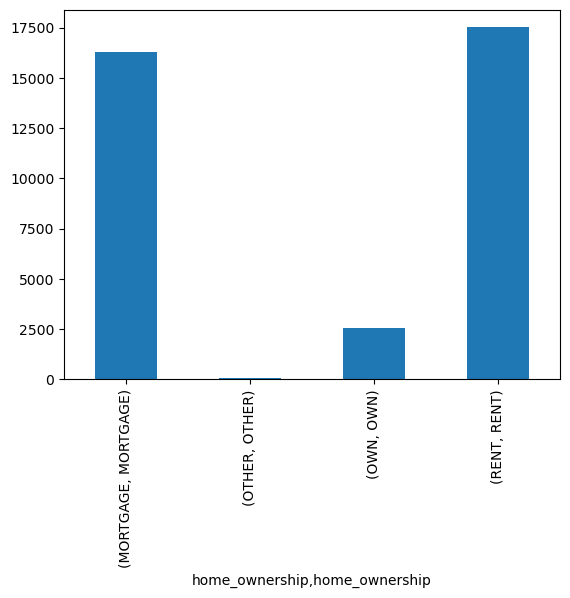

In [42]:
gr=df.groupby(["home_ownership"])
gr["home_ownership"].value_counts().plot.bar()
plt.show()

#### 3.1.3 Analysing the number of OWN, RENT, MORTGAGE and OTHER with Pi chart

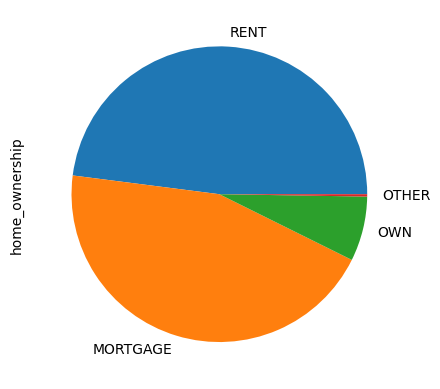

In [43]:
#Plot a pie chart
df['home_ownership'].value_counts().plot.pie()
plt.show()

- With reference to the above visual analysis of home_ownership column, it can be observed that, there are only few loan applicant who are living in Own house. 
- Hence, we should consider home_ownership as one of the major column for further analysis 

#### 3.2  Analysing the loan_status column i.e identification of Current Paying Loan, Fully Paid Loan and Charged off Loan

In [44]:
df["loan_status"].value_counts()

Fully Paid     30432
Charged Off     5004
Current         1066
Name: loan_status, dtype: int64

#### 3.2.1 Analysing the statistics of loan_stats column using Bar Chart 

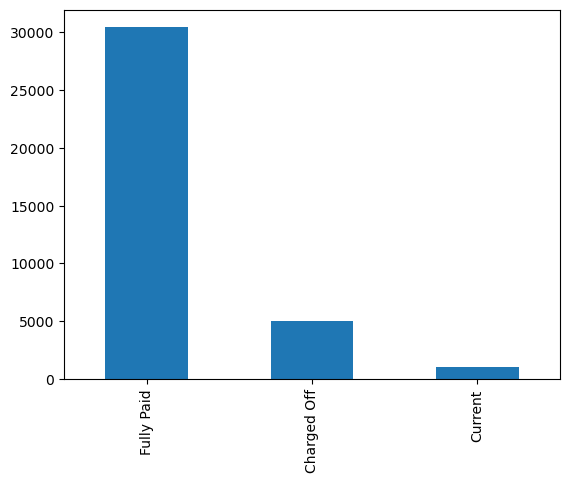

In [45]:
#Plotting a bar chart for loan_status variable
df['loan_status'].value_counts().plot.bar()
plt.show()

#### 3.2.2 Analysing the statistics of loan_stats column using count plot 

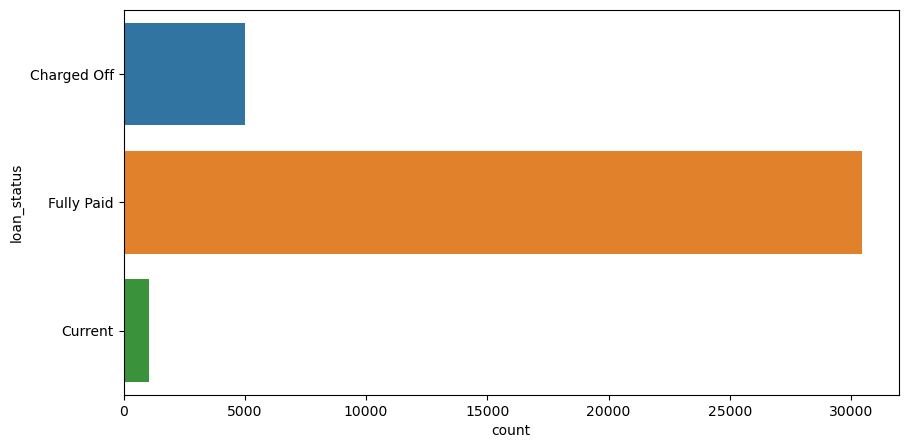

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(y="loan_status", data=df)
plt.show()

- With reference to the above visual analysis of loan_status column, it can be observed that, there are some loan applicant who are not paid the past EMI accordingly. 
- Hence, we should consider loan_status as one of the major column for further analysis

#### 3.3  Analysing the emp_length column i.e identification of number of working experience

In [47]:
df["emp_length"].value_counts()

10+ years    8416
2 years      4184
< 1 year     4060
3 years      3921
4 years      3305
5 years      3140
1 year       3036
6 years      2123
7 years      1698
8 years      1408
9 years      1211
Name: emp_length, dtype: int64

#### 3.3.1 Analysing the statistics of total experience of candidate using Bar Chart 

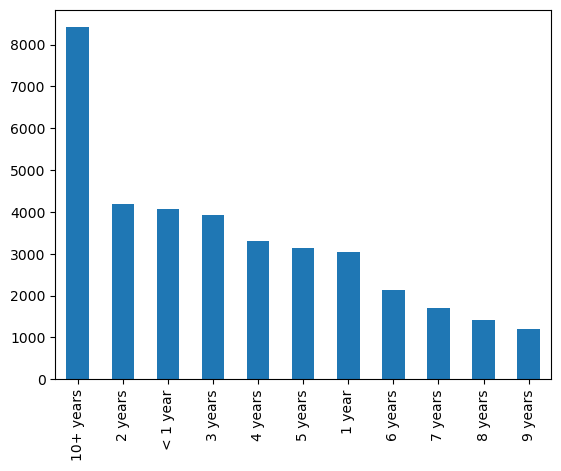

In [48]:
df["emp_length"].value_counts().plot.bar()
plt.show()

- With respect to above visual analysis, we can get the statistics of total experience of loan applicants

#### 3.3.2  Formating the data values of emp_length columns for better data processing 

In [49]:
df["emp_length"] = df["emp_length"].apply(lambda x: x.replace("10+ years" , "11"))
df["emp_length"] = df["emp_length"].apply(lambda x: x.replace("< 1 year" , "0"))
df["emp_length"] = df["emp_length"].apply(lambda x: x.replace("1 year" , "1"))
df["emp_length"] = df["emp_length"].apply(lambda x: x.replace("2 years" , "2"))
df["emp_length"] = df["emp_length"].apply(lambda x: x.replace("3 years" , "3"))
df["emp_length"] = df["emp_length"].apply(lambda x: x.replace("4 years" , "4"))
df["emp_length"] = df["emp_length"].apply(lambda x: x.replace("5 years" , "5"))
df["emp_length"] = df["emp_length"].apply(lambda x: x.replace("6 years" , "6"))
df["emp_length"] = df["emp_length"].apply(lambda x: x.replace("7 years" , "7"))
df["emp_length"] = df["emp_length"].apply(lambda x: x.replace("8 years" , "8"))
df["emp_length"] = df["emp_length"].apply(lambda x: x.replace("9 years" , "9"))


In [50]:
df["emp_length"].value_counts()

11    8416
2     4184
0     4060
3     3921
4     3305
5     3140
1     3036
6     2123
7     1698
8     1408
9     1211
Name: emp_length, dtype: int64

In [51]:
df["emp_length"].describe()

count     36502
unique       11
top          11
freq       8416
Name: emp_length, dtype: object

#### 3.3.3 Changing the Data Type of emp_length for further processing

In [52]:
df["emp_length"] = df["emp_length"].astype(float)

#### 3.3.4 Displaying the Statistical information of emp_length column

In [53]:
df["emp_length"].describe()

count    36502.000000
mean         5.244918
std          3.876361
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         11.000000
Name: emp_length, dtype: float64

In [54]:
df.head(3)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,0.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Sep-13,0.0
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,11.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Apr-16,0.0
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,0.0


#### 3.4 Analysisng the grade column for better understaing 

<AxesSubplot:xlabel='grade', ylabel='Count'>

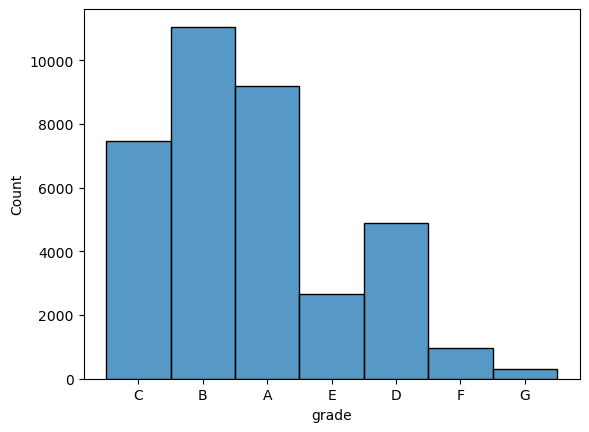

In [55]:
sns.histplot(df["grade"])

- From the visual graph of grade column in loan data set, it can be observed that, some loan applicants has paid loan regulaly and some loan applicants have not paid loan in time
- Hence, we can consider the loan applicants who has grad between A & C, can be consider for further investigation and analysis

#### 3.5 Bivariate Analysis

- Bivariate analysis helps in analysing the relationship between two variables.

#### 3.5.1 Anaysisng the relationship between two or more columns for better understanding

In [56]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies
count,3.650200e+04,36502.000000,36502.000000,36502.000000,36502.000000,36502.000000,3.650200e+04,36502.000000,36502.000000,36502.000000,36502.000000,36502.000000,36502.000000,36502.000000,36502.000000,36502.000000,36502.000000,36502.000000,36502.000000,36502.000000,36502.000000,36502.000000,36502.000000,36502.000000
mean,8.610428e+05,11303.084762,11028.517615,10595.119919,326.068733,5.244918,6.926370e+04,13.441777,0.146266,0.865679,9.347871,0.053805,13452.310504,22.234371,52.366516,52.114614,12291.218381,11821.872709,9895.510041,2300.659832,1.297383,93.751206,11.777029,0.041505
std,2.538574e+05,7435.236823,7167.973672,7072.759559,207.424732,3.876361,6.349653e+04,6.643955,0.492626,1.063817,4.373230,0.235149,15693.058493,11.377197,379.498490,378.092761,9053.583439,8916.060334,7058.681319,2629.147806,7.059174,685.515975,141.247192,0.200416
min,1.124930e+05,500.000000,500.000000,0.000000,16.080000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.754345e+05,5600.000000,5500.000000,5000.000000,168.860000,2.000000,4.200000e+04,8.350000,0.000000,0.000000,6.000000,0.000000,3825.000000,14.000000,0.000000,0.000000,5653.365935,5394.480000,4800.000000,675.342500,0.000000,0.000000,0.000000,0.000000
50%,8.569635e+05,10000.000000,10000.000000,9200.000000,283.200000,4.000000,6.000000e+04,13.535000,0.000000,1.000000,9.000000,0.000000,9020.000000,21.000000,0.000000,0.000000,10080.669200,9618.180000,8074.720000,1377.790000,0.000000,0.000000,0.000000,0.000000
75%,1.049744e+06,15000.000000,15000.000000,14500.000000,431.962500,9.000000,8.300000e+04,18.690000,0.000000,1.000000,12.000000,0.000000,17204.500000,29.000000,0.000000,0.000000,16679.595972,16078.140000,14000.000000,2888.025000,0.000000,0.000000,0.000000,0.000000
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,11.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,2.000000


#### 3.5.2 Anaysisng the home_ownership column with  loan_status for better understanding

In [57]:
# Running analysis on home ownership type
df_pivoted_home=df.pivot_table(index=["home_ownership"],values="member_id",columns="loan_status",aggfunc="count",fill_value=0)
df_pivoted_home.reset_index(inplace=True)
df_pivoted_home

loan_status,home_ownership,Charged Off,Current,Fully Paid
0,MORTGAGE,2075,597,13643
1,OTHER,18,0,76
2,OWN,349,70,2162
3,RENT,2562,399,14551


- From the bove analysis, it can be observed that, the loan applicants who also stay in RENT and MORTGAGE have a good statistics in previous loan payment history. 
- Hence, we can also consider the loan applicants who stay is RENT and Mortgage with good previous loan records.

#### 3.5.3 Anaysisng the purpose column with  loan_status for better understanding

In [58]:
df_purpose=df.pivot_table(index="purpose",columns="loan_status",values="member_id",aggfunc="count",fill_value=0)
df_purpose.reset_index(inplace=True)
df_purpose

loan_status,purpose,Charged Off,Current,Fully Paid
0,car,149,48,1246
1,credit_card,480,100,4148
2,debt_consolidation,2537,559,14404
3,educational,47,0,233
4,home_improvement,299,91,2318
5,house,54,13,278
6,major_purchase,194,35,1784
7,medical,95,12,527
8,moving,79,6,444
9,other,553,113,2918


#### 3.5.4 Anaysisng the purpose column with  loan_status  using bar chart

<AxesSubplot:xlabel='purpose'>

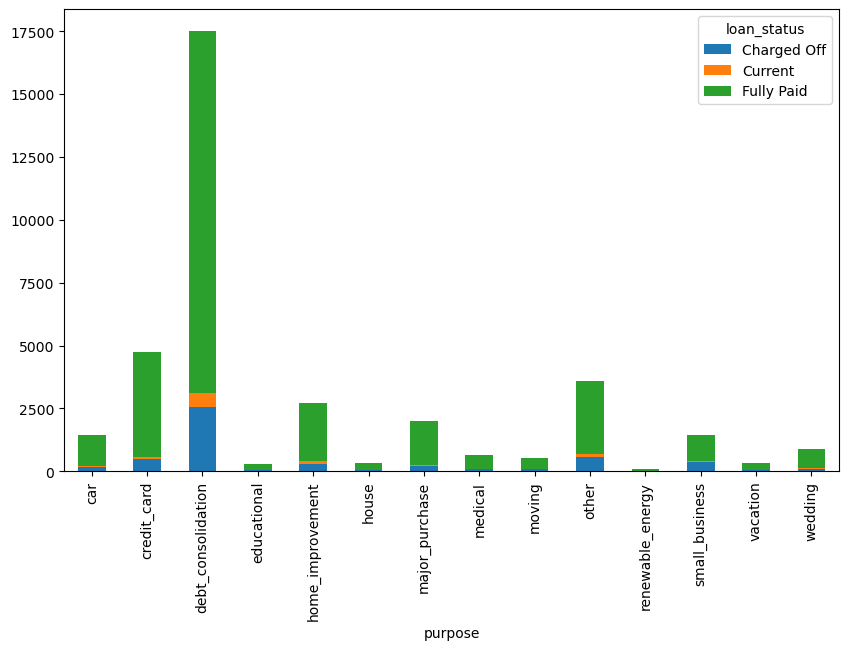

In [59]:
df_purpose.plot(kind="bar",stacked=True,x="purpose",figsize=(10,6))

- From the bove analysis, we can observe the purpose of each loan applicants 

#### 3.5.5 Details the grade "A" of loan applicants

In [60]:
filt = df["grade"] == "A"
df.loc[filt, ["grade", "home_ownership", "emp_title", "annual_inc", "loan_amnt", "loan_status"]]

,grade,home_ownership,emp_title,annual_inc,loan_amnt,loan_status
id,,,,,,
1075269,A,RENT,Veolia Transportaton,36000.00,5000,Fully Paid
1069971,A,MORTGAGE,Duracell,110000.00,3600,Fully Paid
1069742,A,RENT,Network Interpreting Service,77385.19,9200,Fully Paid
1069539,A,MORTGAGE,Audubon Mutual Housing Corporation,75000.00,31825,Fully Paid
1069591,A,RENT,Good Samaritan Society,24044.00,5000,Fully Paid
...,...,...,...,...,...,...
289994,A,RENT,AirTran Airways,40000.00,7500,Fully Paid
288392,A,RENT,Staples Inc.,14800.00,2800,Fully Paid
287454,A,RENT,Wissahickon Cyclery,30000.00,3500,Fully Paid


- The above staticstics display the important details who's grade is A 

#### 3.5.6 Details the grade "B" of loan applicants

In [61]:
filt = df["grade"] == "B"
df.loc[filt, ["grade", "home_ownership", "emp_title", "annual_inc", "loan_amnt", "loan_status"]]

,grade,home_ownership,emp_title,annual_inc,loan_amnt,loan_status
id,,,,,,
1075358,B,RENT,University Medical Group,80000.00,3000,Current
1071570,B,RENT,Starbucks,15000.00,5375,Charged Off
1069908,B,OWN,UCLA,75000.00,12000,Fully Paid
1069866,B,RENT,Target,15000.00,3000,Fully Paid
1069057,B,RENT,SFMTA,100000.00,10000,Charged Off
...,...,...,...,...,...,...
252482,B,RENT,CITY OF LOS ANGELES,82600.00,10800,Fully Paid
240220,B,RENT,AT&T Inc.,47000.00,1300,Fully Paid
222829,B,RENT,County of San Diego,88068.00,14400,Fully Paid


- The above staticstics display the important details who's grade is B

#### 3.5.7 Details the grade "C" of loan applicants

In [62]:
filt = df["grade"] == "C"
df.loc[filt, ["grade", "home_ownership", "emp_title", "annual_inc", "loan_amnt", "loan_status"]]

,grade,home_ownership,emp_title,annual_inc,loan_amnt,loan_status
id,,,,,,
1077430,C,RENT,Ryder,30000.0,2500,Charged Off
1076863,C,RENT,AIR RESOURCES BOARD,49200.0,10000,Fully Paid
1069639,C,RENT,Southern Star Photography,47004.0,7000,Fully Paid
1070078,C,OWN,Southwest Rural metro,72000.0,6500,Fully Paid
1064687,C,RENT,Va. Dept of Conservation/Recreation,30000.0,9000,Charged Off
...,...,...,...,...,...,...
223308,C,MORTGAGE,Tradelink,85000.0,7500,Fully Paid
218343,C,MORTGAGE,Social Security Administration (SSA),11029.0,2150,Charged Off
158706,C,RENT,Fullmoon Software,80000.0,12375,Fully Paid


- The above staticstics display the important details who's grade is C

#### 3.5.8 Details the grade "D" of loan applicants

In [63]:
filt = df["grade"] == "D"
df.loc[filt, ["grade", "home_ownership", "emp_title", "annual_inc", "loan_amnt", "loan_status"]]

,grade,home_ownership,emp_title,annual_inc,loan_amnt,loan_status
id,,,,,,
1069759,D,RENT,Internal revenue Service,28000.0,1000,Fully Paid
1069657,D,RENT,Frito Lay,50004.0,5000,Charged Off
1060578,D,RENT,citizens bank,55000.0,4400,Fully Paid
1068945,D,MORTGAGE,Triple D security,33000.0,7100,Fully Paid
1068923,D,RENT,Omniplex,62000.0,8000,Fully Paid
...,...,...,...,...,...,...
246276,D,RENT,Wackenhut Security,29136.0,10100,Charged Off
202270,D,RENT,Modern Marketing Concepts,50000.0,4000,Charged Off
200912,D,MORTGAGE,Modern Woodmen of America,50000.0,9400,Fully Paid


- The above staticstics display the important details who's grade is D

#### 3.5.9 Details the grade "E" of loan applicants

In [64]:
filt = df["grade"] == "E"
df.loc[filt, ["grade", "home_ownership", "emp_title", "annual_inc", "loan_amnt", "loan_status"]]

,grade,home_ownership,emp_title,annual_inc,loan_amnt,loan_status
id,,,,,,
1072053,E,RENT,MKC Accounting,48000.0,3000,Fully Paid
1069410,E,RENT,Costco,50000.0,21000,Charged Off
1068409,E,RENT,CA Technologies,81000.0,16000,Fully Paid
1048390,E,MORTGAGE,AVMED HEALTH PLANS,65000.0,18000,Fully Paid
1065674,E,RENT,Claret Wine Bar,120000.0,8200,Fully Paid
...,...,...,...,...,...,...
299146,E,RENT,New York & Company,75000.0,20000,Fully Paid
288720,E,MORTGAGE,Eagle Alliance,90000.0,20000,Fully Paid
287965,E,MORTGAGE,City Furniture,75000.0,19600,Fully Paid


- The above staticstics display the important details who's grade is E

#### 3.5.10 Analysis of home_ownership and Grade Column for further analysis

In [65]:
gr = df.groupby(["home_ownership"])

In [66]:
gr.get_group("OWN").head(3)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1070078,1305201,6500,6500,6500.0,60 months,14.65%,153.45,C,C3,Southwest Rural metro,5.0,OWN,72000.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,AZ,16.12,0,Jan-98,2,14,0,4032,20.60%,23,0.0,0.0,7678.017673,7678.02,6500.0,1178.02,0.0,0.0,0.0,Dec-15,0.0
1069908,1305008,12000,12000,12000.0,36 months,12.69%,402.54,B,B5,UCLA,11.0,OWN,75000.0,Source Verified,Dec-11,Fully Paid,debt_consolidation,CA,10.78,0,Oct-89,0,12,0,23336,67.10%,34,0.0,0.0,13947.989160,13947.99,12000.0,1947.99,0.0,0.0,0.0,Aug-13,0.0
1069710,1304821,10000,10000,10000.0,36 months,11.71%,330.76,B,B3,Value Air,11.0,OWN,50000.0,Source Verified,Dec-11,Fully Paid,credit_card,TX,11.18,0,Jul-85,0,8,0,10056,82.40%,21,0.0,0.0,11907.350000,11907.35,10000.0,1907.35,0.0,0.0,0.0,May-16,0.0


In [67]:
gr.get_group("RENT").head(3)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,0.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Sep-13,0.0
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,11.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Apr-16,0.0
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,0.0


In [68]:
gr.get_group("MORTGAGE").head(3)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1069971,1304884,3600,3600,3600.0,36 months,6.03%,109.57,A,A1,Duracell,11.0,MORTGAGE,110000.0,Not Verified,Dec-11,Fully Paid,major_purchase,CT,10.52,0,Aug-93,0,20,0,22836,16%,42,0.0,0.0,3785.271965,3785.27,3600.0,185.27,0.0,0.0,0.0,May-14,0.0
1062474,1294539,6000,6000,6000.0,36 months,11.71%,198.46,B,B3,Connection Inspection,1.0,MORTGAGE,84000.0,Verified,Dec-11,Fully Paid,medical,UT,18.44,2,Oct-03,0,4,0,0,37.73%,14,0.0,0.0,7167.072893,7167.07,6000.0,1152.07,15.0,0.0,0.0,Jul-15,0.0
1069697,1273773,15000,15000,15000.0,36 months,9.91%,483.38,B,B1,Winfield Pathology Consultants,2.0,MORTGAGE,92000.0,Verified,Dec-11,Fully Paid,credit_card,IL,29.44,0,Feb-02,0,8,0,13707,93.90%,31,0.0,0.0,15823.999050,15824.00,15000.0,824.00,0.0,0.0,0.0,Sep-12,0.0


In [69]:
gr["loan_status"].value_counts()

home_ownership  loan_status
MORTGAGE        Fully Paid     13643
                Charged Off     2075
                Current          597
OTHER           Fully Paid        76
                Charged Off       18
OWN             Fully Paid      2162
                Charged Off      349
                Current           70
RENT            Fully Paid     14551
                Charged Off     2562
                Current          399
Name: loan_status, dtype: int64

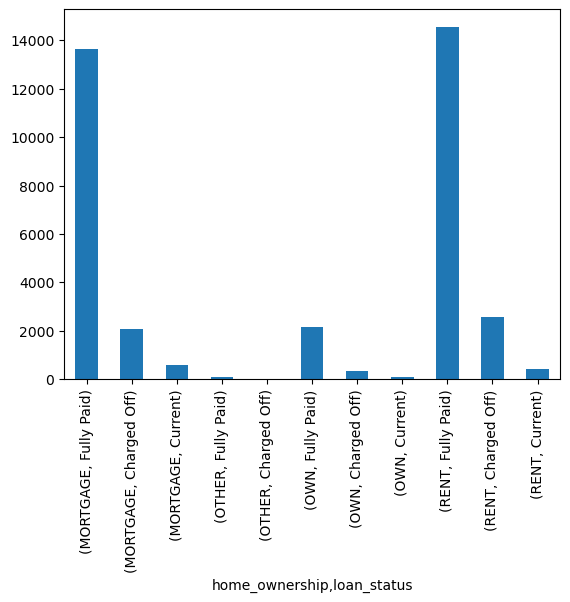

In [70]:
gr["loan_status"].value_counts().plot.bar()
plt.show()

In [71]:
res = pd.pivot_table(data=df,index="home_ownership",columns="loan_status",values="member_id",aggfunc="count", fill_value=0)


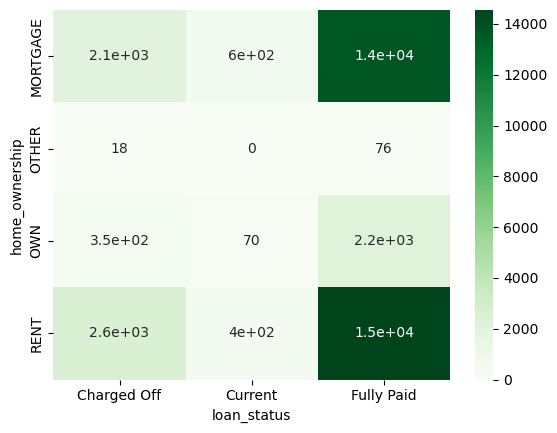

In [72]:
sns.heatmap(res, cmap = "Greens", annot=True)
plt.show()

- The above statistic segregats the total number of fully paid , current and charged off loan of each home_ownership column

In [73]:
gr["grade"].value_counts()

home_ownership  grade
MORTGAGE        B        4825
                A        4738
                C        3046
                D        1907
                E        1185
                F         469
                G         145
OTHER           B          30
                A          23
                D          17
                C          16
                E           6
                F           2
OWN             B         779
                A         698
                C         517
                D         327
                E         182
                F          58
                G          20
RENT            B        5415
                C        3873
                A        3723
                D        2640
                E        1285
                F         441
                G         135
Name: grade, dtype: int64

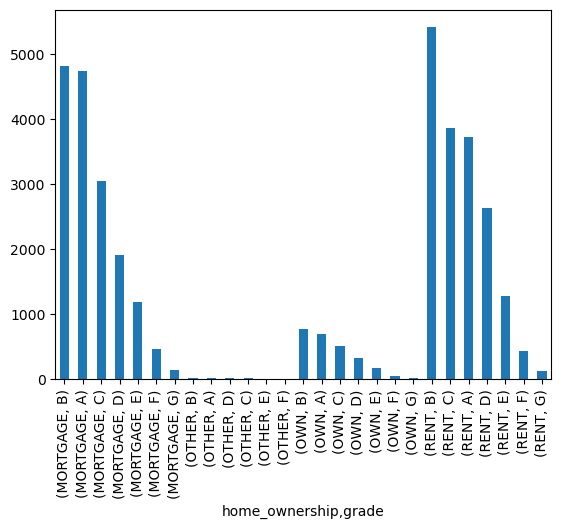

In [74]:
gr["grade"].value_counts().plot.bar()
plt.show()

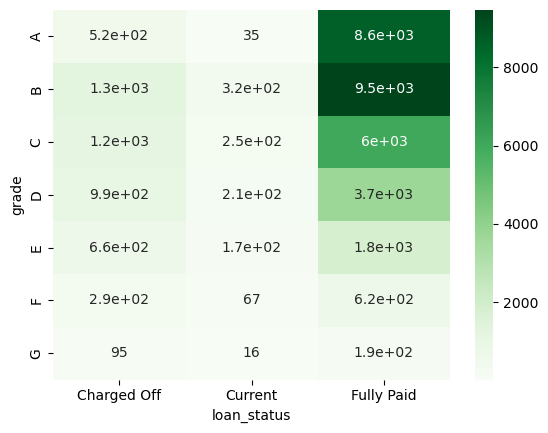

In [75]:
res = pd.pivot_table(data=df,index="grade",columns="loan_status",values="member_id",aggfunc="count", fill_value=0)
sns.heatmap(res, cmap = "Greens", annot=True)
plt.show()

- The above statistic segregats the grade of loan applicants each loan_status column

### 3.6 Derived Metrics
- A derived metric is a calculation based on the data included in the report definition.

#### 3.6.1 Analysing issue_d columns and deriving new column called Month and Year 
- we can derive new columns using issue_d column 

In [76]:
df.issue_d.value_counts()

Dec-11    2127
Nov-11    2052
Oct-11    1955
Sep-11    1931
Aug-11    1811
Jul-11    1738
Jun-11    1705
May-11    1578
Apr-11    1465
Mar-11    1344
Jan-11    1299
Feb-11    1186
Dec-10    1174
Jul-10    1065
Nov-10    1065
Oct-10    1049
Aug-10    1032
Sep-10    1031
Jun-10     968
May-10     873
Apr-10     787
Mar-10     680
Feb-10     577
Nov-09     537
Jan-10     517
Dec-09     514
Oct-09     507
Sep-09     439
Aug-09     398
Jul-09     362
Jun-09     342
May-09     307
Apr-09     279
Mar-09     267
Feb-09     253
Jan-09     229
Dec-08     214
Nov-08     175
Apr-08     145
Mar-08     112
Oct-08      93
Jul-08      77
May-08      69
Aug-08      66
Jun-08      61
Sep-08      29
Feb-08       6
Jan-08       6
Dec-07       2
Aug-07       2
Nov-07       1
Oct-07       1
Name: issue_d, dtype: int64

#### 3.6.2 Deriving new columns (Month and Year)

In [77]:
df["month"] = df["issue_d"].apply(lambda x: x[:3])
df["Year"] = df["issue_d"].apply(lambda x: x[-2:])

#### 3.6.2 Confirmation of new columns called Month and Year

In [78]:
df.head(1)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies,month,Year
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,0.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.0,0,Apr-99,5,3,0,1687,9.40%,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.11,Sep-13,0.0,Dec,11


#### 3.6.3 Deriving the new column called "Risk" with the help of other metrics as mentioned Below. 

In [79]:
Grade=["A", "B", "C"]
Sub_Grade = ["A1", "A2", "A3", "A4", "A5", "B1", "B2", "B3", "B4", "B5", "C1", "C2", "C3", "C4", "C5", "D1", "D2", "D3", "D4", "D5"]
Home = ["RENT", "OWN", "MORTGAGE"]
loan_status = ["Current", "Fully Paid"]
verification = ["Verified", "Source Verified"]
df["Risk"] = (df["home_ownership"].isin(Home) ) & (df["grade"].isin(Grade)) & (df["loan_status"].isin(loan_status)) & (df["annual_inc"]>= 40000)


- The loan applicants who has good records of previous loan such as grade, sub-grade, loan status, verification status  can be considered as Good_Loan else condidered as Bad_Loan
- Based on the above statistics,  let us derive new column called "Risk" to decide whether the loan application is good loan or bad loan 

#### 3.6.4 Analysisng the Risk Column for Better Understanding
- Counting the number of Good Loan and Bad Loan applications of loan applicants

In [80]:
df["Risk"].value_counts()

True     19356
False    17146
Name: Risk, dtype: int64

#### 3.6.5 Changing the "Risk" column data type to string using following commands

In [81]:
df["Risk"] = df["Risk"].astype(str)

#### 3.6.6 The Loan application is decided as "Good_Loan" or "Bad_Loan" with the help of "Risk" Column

In [82]:
df["Risk"] = df["Risk"].apply(lambda x: x.replace("True","Good_Loan"))
df["Risk"] = df["Risk"].apply(lambda x: x.replace("False","Bad_Loan"))

#### 3.6.6 Analysisng the statistics of Risk Column for Better Understanding

In [83]:
df["Risk"].value_counts() 

Good_Loan    19356
Bad_Loan     17146
Name: Risk, dtype: int64

### 3.4 Analysis of Loan Applcation 
#### 3.4.1 Analysis and Identification of Loan Applcation based on the above inputs using Risk Column using histogram graph
- Based on the above EDA Process, the loan applicatios can be categorized in Good_Loan and Bad_Loan.
- The same is represented using histogram graph 

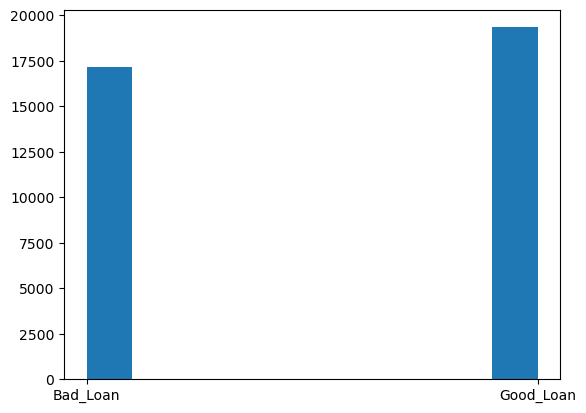

In [84]:
plt.hist(df["Risk"])
plt.show()

- The above visual graph represents the total number of Good_Loan and Bad_Loan 
- For the next level analysis, we can consider only the Good_Loan and we can reject the all the Bad_Loan applications of Loan Applicants

#### 3.4.2 Analysis of Loan Applcation based on the Risk Column using bar chat

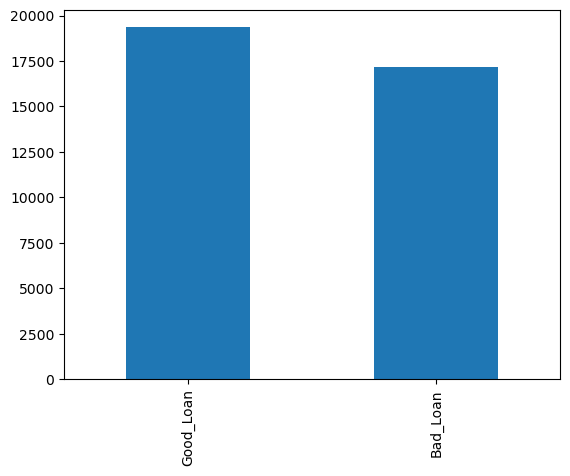

In [85]:
df['Risk'].value_counts().plot.bar()
plt.show()

#### 3.4.3 Displaying the details of Good_loan  of loan data set

In [86]:
df_Good = df["Risk"]=="Good_Loan"
df.loc[df_Good, :].head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies,month,Year,Risk
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,11.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.0,Apr-16,0.0,Dec,11,Good_Loan
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.0,0.0,May-16,0.0,Dec,11,Good_Loan
1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8.0,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.0,0.0,May-16,0.0,Dec,11,Good_Loan
1070078,1305201,6500,6500,6500.0,60 months,14.65%,153.45,C,C3,Southwest Rural metro,5.0,OWN,72000.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,AZ,16.12,0,Jan-98,2,14,0,4032,20.60%,23,0.00,0.00,7678.017673,7678.02,6500.00,1178.02,0.00,0.0,0.0,Dec-15,0.0,Dec,11,Good_Loan
1069908,1305008,12000,12000,12000.0,36 months,12.69%,402.54,B,B5,UCLA,11.0,OWN,75000.0,Source Verified,Dec-11,Fully Paid,debt_consolidation,CA,10.78,0,Oct-89,0,12,0,23336,67.10%,34,0.00,0.00,13947.989160,13947.99,12000.00,1947.99,0.00,0.0,0.0,Aug-13,0.0,Dec,11,Good_Loan


#### 3.4.4 Displaying the details of Bad_Loan of loan data set

In [87]:
df_Bad = df["Risk"]=="Bad_Loan"
df.loc[df_Bad, :]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies,month,Year,Risk
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077430,1314167,2500,2500,2500.000000,60 months,15.27%,59.83,C,C4,Ryder,0.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Sep-13,0.0,Dec,11,Bad_Loan
1075269,1311441,5000,5000,5000.000000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3.0,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.0,0.00,0.00,Jan-16,0.0,Dec,11,Bad_Loan
1072053,1288686,3000,3000,3000.000000,36 months,18.64%,109.43,E,E1,MKC Accounting,9.0,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.0,0.00,0.00,Dec-14,0.0,Dec,11,Bad_Loan
1071570,1306721,5375,5375,5350.000000,60 months,12.69%,121.45,B,B5,Starbucks,0.0,RENT,15000.0,Verified,Dec-11,Charged Off,other,TX,18.08,0,Sep-04,0,2,0,9279,36.50%,3,0.0,0.0,1476.190000,1469.34,673.48,533.42,0.0,269.29,2.52,Mar-13,0.0,Dec,11,Bad_Loan
1064687,1298717,9000,9000,9000.000000,36 months,13.49%,305.38,C,C1,Va. Dept of Conservation/Recreation,0.0,RENT,30000.0,Source Verified,Dec-11,Charged Off,debt_consolidation,VA,10.08,0,Apr-04,1,4,0,10452,91.70%,9,0.0,0.0,2270.700000,2270.70,1256.14,570.26,0.0,444.30,4.16,Nov-12,0.0,Dec,11,Bad_Loan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200912,200892,9400,9400,1748.288384,36 months,13.30%,318.09,D,D4,Modern Woodmen of America,9.0,MORTGAGE,50000.0,Not Verified,Jan-08,Fully Paid,credit_card,NY,17.04,0,Jan-91,3,9,1,5181,97.80%,41,0.0,0.0,11495.173170,2122.53,9400.00,2080.17,15.0,0.00,0.00,Mar-11,1.0,Jan,08,Bad_Loan
154154,151536,4800,4800,1100.000000,36 months,10.28%,155.52,C,C1,E.E. Wine Inc,1.0,RENT,35000.0,Not Verified,Nov-07,Fully Paid,debt_consolidation,VA,7.51,0,Mar-00,0,11,1,5836,68.70%,12,0.0,0.0,5134.085288,1176.56,4800.00,334.09,0.0,0.00,0.00,Aug-08,1.0,Nov,07,Bad_Loan
132892,132889,9000,9000,700.000000,36 months,12.49%,301.04,D,D3,Maximus,8.0,MORTGAGE,39000.0,Not Verified,Oct-07,Charged Off,debt_consolidation,MD,5.08,0,Aug-97,3,9,1,26233,62.90%,37,0.0,0.0,4015.960000,311.64,1496.83,609.26,0.0,1909.87,668.36,May-16,1.0,Oct,07,Bad_Loan


### 4 Define the new DataFrame called df_Res
- Based on the previous obtained analysis,  let us create a new data frame for further analysis i.e to decide for granting Full loan or Defaulted Loan


In [88]:
df_Res = df[df["home_ownership"].isin(Home) &  (df["grade"].isin(Grade)) & (df["loan_status"].isin(loan_status)) & (df["annual_inc"]>= 40000)]

In [89]:
df_Res.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies,month,Year,Risk
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,11.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.0,Apr-16,0.0,Dec,11,Good_Loan
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.0,0.0,May-16,0.0,Dec,11,Good_Loan
1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8.0,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.0,0.0,May-16,0.0,Dec,11,Good_Loan
1070078,1305201,6500,6500,6500.0,60 months,14.65%,153.45,C,C3,Southwest Rural metro,5.0,OWN,72000.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,AZ,16.12,0,Jan-98,2,14,0,4032,20.60%,23,0.00,0.00,7678.017673,7678.02,6500.00,1178.02,0.00,0.0,0.0,Dec-15,0.0,Dec,11,Good_Loan
1069908,1305008,12000,12000,12000.0,36 months,12.69%,402.54,B,B5,UCLA,11.0,OWN,75000.0,Source Verified,Dec-11,Fully Paid,debt_consolidation,CA,10.78,0,Oct-89,0,12,0,23336,67.10%,34,0.00,0.00,13947.989160,13947.99,12000.00,1947.99,0.00,0.0,0.0,Aug-13,0.0,Dec,11,Good_Loan


#### 4.1  Analysis of verification_status of Good_Loan 

In [90]:
df["verification_status"].value_counts()

Not Verified       15089
Verified           11945
Source Verified     9468
Name: verification_status, dtype: int64

#### 4.2 Analysis of loan_amount (Requested Loan Amount) and  annual_inc (Salary) using Scatter plot

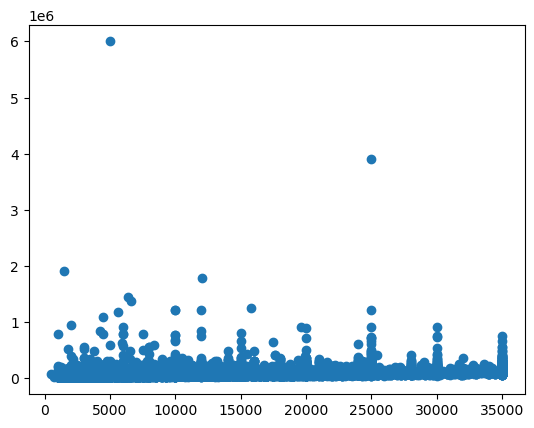

In [91]:
plt.scatter(df.loan_amnt, df.annual_inc)
plt.show()

#### 4.3 Analysis of percentage of loan amount over salary 

In [92]:
df_Res["Percentage_of_Loan"]= df_Res["loan_amnt"]/df_Res["annual_inc"]*100

#### 4.4 Obtaining the statistical information of Percentage column in new data frame called Df_Res

In [93]:
df_Res["Percentage_of_Loan"].describe()

count    19356.000000
mean        15.972344
std         10.043930
min          0.078947
25%          8.333333
50%         13.888889
75%         21.428571
max         71.850230
Name: Percentage_of_Loan, dtype: float64

#### 4.4 Analysis of percentage of loan amount over salary  using bloxplot

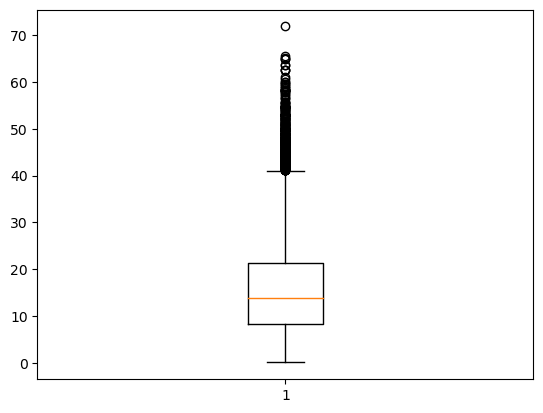

In [94]:
plt.boxplot(df_Res["Percentage_of_Loan"])
plt.show()

- From the above boxplot and statistical informations, we can identify that, some loan applicants are requesting 
more loan amount i. e more than the 50 percentage of their salary


#### 4.5 Details of loan applicants who are requesting for more loan amount with respect to their annual_inc (Salary)

In [95]:
df_Res[df_Res["Percentage_of_Loan"]>50]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies,month,Year,Risk,Percentage_of_Loan
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1068326,1302942,24000,24000,24000.00000,36 months,10.65%,781.76,B,B2,City of Newport Beach,11.0,RENT,45000.00,Verified,Dec-11,Fully Paid,debt_consolidation,CA,14.80,0,Feb-90,0,5,0,24708,55.20%,9,0.00,0.00,28143.25001,28143.25,24000.00,4143.25,0.00,0.0,0.0,Dec-14,0.0,Dec,11,Good_Loan,53.333333
1061776,1293397,27575,27575,27575.00000,36 months,10.65%,898.21,B,B2,Western Wyoming Community College,1.0,MORTGAGE,54000.00,Verified,Dec-11,Fully Paid,other,WY,12.27,0,Jan-88,1,8,0,13057,67.70%,16,0.00,0.00,32335.42000,32335.42,27575.00,4760.42,0.00,0.0,0.0,Apr-15,0.0,Dec,11,Good_Loan,51.064815
1049053,1280217,29500,17900,17850.00000,60 months,14.27%,419.02,C,C2,State Farm Insurance,11.0,RENT,45000.00,Verified,Dec-11,Fully Paid,debt_consolidation,CA,19.09,0,Oct-00,1,7,0,2037,47.40%,39,0.00,0.00,24301.52997,24233.65,17900.00,6401.53,0.00,0.0,0.0,May-16,0.0,Dec,11,Good_Loan,65.555556
1057314,1288878,35000,22050,22025.00000,60 months,12.42%,495.19,B,B4,"Multivista, FL dba Premium Documentation",3.0,MORTGAGE,66000.00,Verified,Dec-11,Current,debt_consolidation,FL,8.96,0,Dec-96,0,12,0,16547,42.90%,17,2169.29,2166.81,27334.56000,27303.60,19880.72,7453.84,0.00,0.0,0.0,May-16,0.0,Dec,11,Good_Loan,53.030303
1055163,1286714,25000,16300,16250.00000,60 months,13.49%,374.98,C,C1,LEMO USA,6.0,RENT,45000.00,Verified,Dec-11,Fully Paid,vacation,CA,3.65,0,Sep-06,0,3,0,25,0.40%,5,0.00,0.00,19982.01298,19920.72,16300.00,3682.01,0.00,0.0,0.0,May-16,0.0,Dec,11,Good_Loan,55.555556
1053270,1284846,30000,30000,30000.00000,36 months,9.91%,966.75,B,B1,YAMILL GLASS @ WINDOWS,11.0,RENT,55000.00,Source Verified,Dec-11,Fully Paid,debt_consolidation,FL,13.37,0,Jun-94,2,8,0,15964,38.60%,21,0.00,0.00,32290.80687,32290.81,30000.00,2290.81,0.00,0.0,0.0,Nov-12,0.0,Dec,11,Good_Loan,54.545455
1053018,1284596,27300,27300,27300.00000,60 months,10.65%,588.82,B,B2,LG Electronics,2.0,RENT,50000.00,Verified,Dec-11,Fully Paid,debt_consolidation,IL,25.70,0,Sep-00,0,9,0,4608,16.80%,20,0.00,0.00,33824.22998,33824.23,27300.00,6524.23,0.00,0.0,0.0,Apr-16,0.0,Dec,11,Good_Loan,54.600000
1048064,1279202,35000,35000,35000.00000,60 months,14.27%,819.30,C,C2,Drumlummand Gold Corp,0.0,MORTGAGE,65000.00,Verified,Dec-11,Current,debt_consolidation,MT,23.80,0,Aug-00,3,7,0,25631,69.50%,32,5482.19,5482.19,43427.48000,43427.48,29517.82,13909.66,0.00,0.0,0.0,May-16,0.0,Dec,11,Good_Loan,53.846154
1042610,1272674,30000,30000,29725.00000,60 months,15.96%,728.91,C,C5,Kaiser Permanente,11.0,MORTGAGE,55097.04,Verified,Dec-11,Fully Paid,home_improvement,GA,16.64,0,Jul-01,1,7,1,3532,14.20%,23,0.00,0.00,30400.31000,30121.64,30000.00,400.31,0.00,0.0,0.0,May-16,1.0,Dec,11,Good_Loan,54.449386


#### 4.6 Details of loan applicants who are requesting for nominal loan amount with respect to their annual_inc (Salary)

In [96]:
df_Res[df_Res["Percentage_of_Loan"]<=50]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies,month,Year,Risk,Percentage_of_Loan
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,11.0,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.0,Apr-16,0.0,Dec,11,Good_Loan,20.325203
1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1.0,RENT,80000.00,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.0,0.0,May-16,0.0,Dec,11,Good_Loan,3.750000
1069639,1304742,7000,7000,7000.00,60 months,15.96%,170.08,C,C5,Southern Star Photography,8.0,RENT,47004.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.0,0.0,May-16,0.0,Dec,11,Good_Loan,14.892350
1070078,1305201,6500,6500,6500.00,60 months,14.65%,153.45,C,C3,Southwest Rural metro,5.0,OWN,72000.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,AZ,16.12,0,Jan-98,2,14,0,4032,20.60%,23,0.00,0.00,7678.017673,7678.02,6500.00,1178.02,0.00,0.0,0.0,Dec-15,0.0,Dec,11,Good_Loan,9.027778
1069908,1305008,12000,12000,12000.00,36 months,12.69%,402.54,B,B5,UCLA,11.0,OWN,75000.00,Source Verified,Dec-11,Fully Paid,debt_consolidation,CA,10.78,0,Oct-89,0,12,0,23336,67.10%,34,0.00,0.00,13947.989160,13947.99,12000.00,1947.99,0.00,0.0,0.0,Aug-13,0.0,Dec,11,Good_Loan,16.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223308,223192,7500,7500,1000.00,36 months,10.78%,244.76,C,C1,Tradelink,1.0,MORTGAGE,85000.00,Not Verified,Jan-08,Fully Paid,small_business,NJ,1.78,1,Jan-82,1,7,1,8035,50.50%,24,0.00,0.00,8826.723137,1176.90,7500.00,1326.72,0.00,0.0,0.0,Feb-11,1.0,Jan,08,Good_Loan,8.823529
222829,222675,14400,14400,1510.69,36 months,9.51%,461.35,B,B2,County of San Diego,11.0,RENT,88068.00,Not Verified,Jan-08,Fully Paid,debt_consolidation,CA,9.96,0,Aug-93,0,10,1,4765,16.50%,32,0.00,0.00,16608.259630,1624.17,14400.00,2208.26,0.00,0.0,0.0,Feb-16,1.0,Jan,08,Good_Loan,16.351001
200600,200597,7500,7500,1599.78,36 months,9.83%,241.41,B,B3,UCLA Medical Center,7.0,RENT,96000.00,Not Verified,Jan-08,Fully Paid,credit_card,CA,2.69,0,Feb-95,0,4,1,1944,47.40%,11,0.00,0.00,8690.585118,1825.35,7500.00,1190.59,0.00,0.0,0.0,May-16,1.0,Jan,08,Good_Loan,7.812500


#### 4.7 Analysis to decide whether to grant Full Loan or Defaulted Loan using below informations

In [97]:
Grade1=["A", "B"]
Sub_Grade1 = ["A1", "A2", "A3", "A4", "A5", "B1", "B2", "B3", "B4", "B5"]
Home1 = ["RENT", "OWN", "MORTGAGE"]
loan_status1 = ["Current", "Fully Paid"]
verification1 = ["Verified", "Source Verified"]
(df_Res["home_ownership"].isin(Home1)) & (df_Res["grade"].isin(Grade1)) & (df_Res["loan_status"].isin(loan_status1)) & (df_Res["Percentage_of_Loan"]<50) & (df_Res["verification_status"].isin(verification1)) & ((df_Res["annual_inc"]>= 50000))

id
1076863    False
1075358     True
1069639    False
1070078    False
1069908     True
           ...  
223308     False
222829     False
200600     False
186572     False
158706     False
Length: 19356, dtype: bool

- Based on the above information anaysis, let us derive new column called "Accepted" in df_Res Dataframe

In [98]:
df_Res["Accepted"]=(df_Res["home_ownership"].isin(Home1)) & (df_Res["grade"].isin(Grade1)) & (df_Res["loan_status"].isin(loan_status1)) & (df_Res["Percentage_of_Loan"]<50) & (df_Res["verification_status"].isin(verification1)) & ((df_Res["annual_inc"]>= 50000))

#### 4.8 Verification of new column in df_Res Data Frame 

In [99]:
df_Res.head(3)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies,month,Year,Risk,Percentage_of_Loan,Accepted
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,11.0,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.0,0.0,Apr-16,0.0,Dec,11,Good_Loan,20.325203,False
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.0,0.0,May-16,0.0,Dec,11,Good_Loan,3.750000,True
1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8.0,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.0,0.0,May-16,0.0,Dec,11,Good_Loan,14.892350,False


In [100]:
df_Res.shape

(19356, 43)

#### 4.9 Analysis of Accepted Loan and Defaulted Loan 

In [101]:
df_Res["Accepted"].value_counts()

False    12690
True      6666
Name: Accepted, dtype: int64

#### 4.10 Changing the Data type of Accepted column from Boolean to String

In [102]:
df_Res["Accepted"] = df_Res["Accepted"].astype(str)

In [103]:
df_Res["Accepted"] = df_Res["Accepted"].apply(lambda x: x.replace("True","Accepted_Loan"))
df_Res["Accepted"] = df_Res["Accepted"].apply(lambda x: x.replace("False","Defaulted_Loan"))

### 5 Analysis of Accepted Full loan and Default Loan

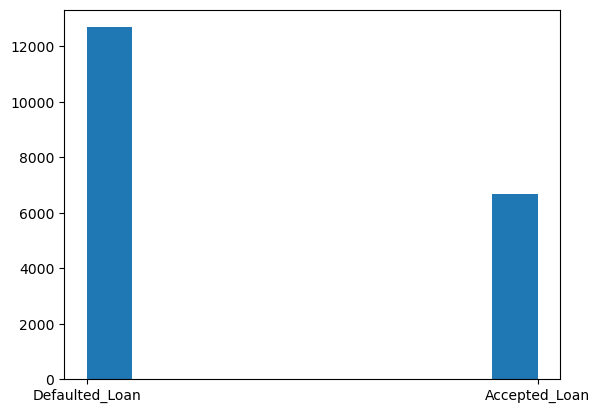

In [104]:
plt.hist(df_Res["Accepted"])
plt.show()

- From the visual graph of histogram, we can get the statictics of Accepted Loan and Defaulted loan

In [105]:
df_Res["Accepted"].value_counts()

Defaulted_Loan    12690
Accepted_Loan      6666
Name: Accepted, dtype: int64

#### 5.1 Analysis of Accepted Loan and Defaulted Loan using Bar Chart

<AxesSubplot:>

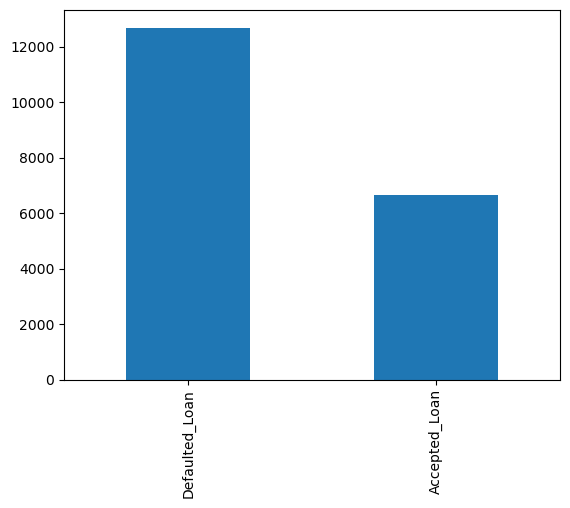

In [106]:
df_Res["Accepted"].value_counts().plot.bar()

#### 5.2 Staticstics of Accepted Loan and Defaulted Loan of Loan Applications

In [107]:
pd.pivot_table(data=df_Res,index="grade",columns="Accepted",values="member_id",aggfunc="count")

Accepted,Accepted_Loan,Defaulted_Loan
grade,,
A,2928.0,3922.0
B,3738.0,3918.0
C,NaN,4850.0


- From the above staticstics, the loan ammont invester can take a decision for provide the full loan amount to Accepted Loan and partial amount for the defaulter loan applications

#### 5.3 Analysis of Accepted Loan and Defaulter loan using heat map

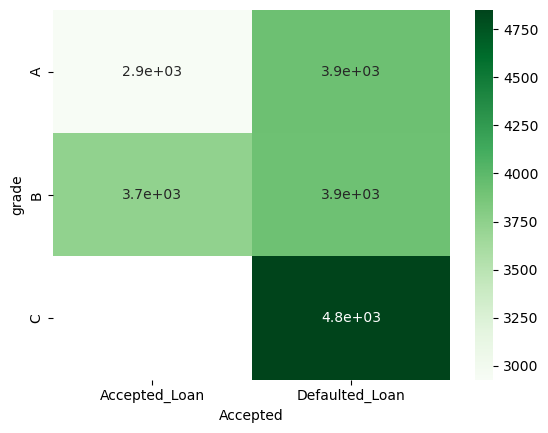

In [108]:
res = pd.pivot_table(data=df_Res,index="grade",columns="Accepted",values="member_id",aggfunc="count")
sns.heatmap(res, cmap = "Greens", annot=True)
plt.show()


#### 5.4 Complete Details of Accpeted Loan applicants

In [109]:
df_Acce = df_Res["Accepted"]=="Accepted_Loan"
df_Res.loc[df_Acce, :]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies,month,Year,Risk,Percentage_of_Loan,Accepted
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1075358,1311748,3000,3000,3000.000000,60 months,12.69%,67.79,B,B5,University Medical Group,1.0,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.0,0.0,0.0,May-16,0.0,Dec,11,Good_Loan,3.750000,Accepted_Loan
1069908,1305008,12000,12000,12000.000000,36 months,12.69%,402.54,B,B5,UCLA,11.0,OWN,75000.0,Source Verified,Dec-11,Fully Paid,debt_consolidation,CA,10.78,0,Oct-89,0,12,0,23336,67.10%,34,0.00,0.00,13947.989160,13947.99,12000.00,1947.99,0.0,0.0,0.0,Aug-13,0.0,Dec,11,Good_Loan,16.000000,Accepted_Loan
1062474,1294539,6000,6000,6000.000000,36 months,11.71%,198.46,B,B3,Connection Inspection,1.0,MORTGAGE,84000.0,Verified,Dec-11,Fully Paid,medical,UT,18.44,2,Oct-03,0,4,0,0,37.73%,14,0.00,0.00,7167.072893,7167.07,6000.00,1152.07,15.0,0.0,0.0,Jul-15,0.0,Dec,11,Good_Loan,7.142857,Accepted_Loan
1069710,1304821,10000,10000,10000.000000,36 months,11.71%,330.76,B,B3,Value Air,11.0,OWN,50000.0,Source Verified,Dec-11,Fully Paid,credit_card,TX,11.18,0,Jul-85,0,8,0,10056,82.40%,21,0.00,0.00,11907.350000,11907.35,10000.00,1907.35,0.0,0.0,0.0,May-16,0.0,Dec,11,Good_Loan,20.000000,Accepted_Loan
1069697,1273773,15000,15000,15000.000000,36 months,9.91%,483.38,B,B1,Winfield Pathology Consultants,2.0,MORTGAGE,92000.0,Verified,Dec-11,Fully Paid,credit_card,IL,29.44,0,Feb-02,0,8,0,13707,93.90%,31,0.00,0.00,15823.999050,15824.00,15000.00,824.00,0.0,0.0,0.0,Sep-12,0.0,Dec,11,Good_Loan,16.304348,Accepted_Loan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355680,358791,1000,1000,92.173793,36 months,7.37%,31.05,A,A1,Retired,11.0,OWN,77367.0,Verified,Sep-08,Fully Paid,other,TX,0.74,0,Sep-74,0,6,0,2440,8.60%,27,0.00,0.00,1117.661387,93.34,1000.00,117.66,0.0,0.0,0.0,Sep-11,0.0,Sep,08,Good_Loan,1.292541,Accepted_Loan
355467,360172,7500,5550,0.000000,36 months,8.32%,174.74,A,A4,L-3 Communications Holdings,1.0,MORTGAGE,82000.0,Verified,Sep-08,Fully Paid,other,VA,4.36,0,Apr-99,3,7,0,26040,49.10%,25,0.00,0.00,6199.019064,0.00,5550.00,649.02,0.0,0.0,0.0,Sep-10,0.0,Sep,08,Good_Loan,9.146341,Accepted_Loan
351964,354815,8000,8000,2141.029177,36 months,10.96%,261.76,B,B5,Kapstone,5.0,MORTGAGE,51000.0,Verified,Jul-08,Fully Paid,credit_card,SC,12.28,1,Jul-01,2,5,0,5329,29.40%,6,0.00,0.00,9423.282903,2241.53,8000.00,1423.29,0.0,0.0,0.0,Jul-11,0.0,Jul,08,Good_Loan,15.686275,Accepted_Loan


#### 5.5 Complete Details of Defaulted Loan applicants

In [110]:
df_Def= df_Res["Accepted"]=="Defaulted_Loan"
df_Res.loc[df_Def, :]

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies,month,Year,Risk,Percentage_of_Loan,Accepted
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,11.0,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.0,Apr-16,0.0,Dec,11,Good_Loan,20.325203,Defaulted_Loan
1069639,1304742,7000,7000,7000.00,60 months,15.96%,170.08,C,C5,Southern Star Photography,8.0,RENT,47004.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.00,0.0,0.0,May-16,0.0,Dec,11,Good_Loan,14.892350,Defaulted_Loan
1070078,1305201,6500,6500,6500.00,60 months,14.65%,153.45,C,C3,Southwest Rural metro,5.0,OWN,72000.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,AZ,16.12,0,Jan-98,2,14,0,4032,20.60%,23,0.0,0.0,7678.017673,7678.02,6500.00,1178.02,0.00,0.0,0.0,Dec-15,0.0,Dec,11,Good_Loan,9.027778,Defaulted_Loan
1065775,1299699,10000,10000,10000.00,36 months,15.27%,347.98,C,C4,Chin's Restaurant,4.0,RENT,42000.00,Not Verified,Dec-11,Fully Paid,home_improvement,CA,18.60,0,Oct-98,2,14,0,24043,70.20%,28,0.0,0.0,12527.150000,12527.15,10000.00,2527.15,0.00,0.0,0.0,Apr-15,0.0,Dec,11,Good_Loan,23.809524,Defaulted_Loan
1069971,1304884,3600,3600,3600.00,36 months,6.03%,109.57,A,A1,Duracell,11.0,MORTGAGE,110000.00,Not Verified,Dec-11,Fully Paid,major_purchase,CT,10.52,0,Aug-93,0,20,0,22836,16%,42,0.0,0.0,3785.271965,3785.27,3600.00,185.27,0.00,0.0,0.0,May-14,0.0,Dec,11,Good_Loan,3.272727,Defaulted_Loan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223308,223192,7500,7500,1000.00,36 months,10.78%,244.76,C,C1,Tradelink,1.0,MORTGAGE,85000.00,Not Verified,Jan-08,Fully Paid,small_business,NJ,1.78,1,Jan-82,1,7,1,8035,50.50%,24,0.0,0.0,8826.723137,1176.90,7500.00,1326.72,0.00,0.0,0.0,Feb-11,1.0,Jan,08,Good_Loan,8.823529,Defaulted_Loan
222829,222675,14400,14400,1510.69,36 months,9.51%,461.35,B,B2,County of San Diego,11.0,RENT,88068.00,Not Verified,Jan-08,Fully Paid,debt_consolidation,CA,9.96,0,Aug-93,0,10,1,4765,16.50%,32,0.0,0.0,16608.259630,1624.17,14400.00,2208.26,0.00,0.0,0.0,Feb-16,1.0,Jan,08,Good_Loan,16.351001,Defaulted_Loan
200600,200597,7500,7500,1599.78,36 months,9.83%,241.41,B,B3,UCLA Medical Center,7.0,RENT,96000.00,Not Verified,Jan-08,Fully Paid,credit_card,CA,2.69,0,Feb-95,0,4,1,1944,47.40%,11,0.0,0.0,8690.585118,1825.35,7500.00,1190.59,0.00,0.0,0.0,May-16,1.0,Jan,08,Good_Loan,7.812500,Defaulted_Loan


### 6. Conclusion
- The analysis presented above is related to Loan data Set. 
- The aim of this analysis to reduce the loss percentage of Consumer Finance Company by providing the loan to loan applicants
- This detailed analysis of loan dataset using EDA addresses the two key challeges 
    - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
    - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company
- The analysis presented above, identifies the number of Good_loan and Bad_loans using various EDA process and, also identify the staticstics to approve Full loan and Defaulted loan based on the loan applications. 
- Hence, by identifing staticstics to Full approved loan and dfaulted loan, reduces the loss percentage for the Finance Company